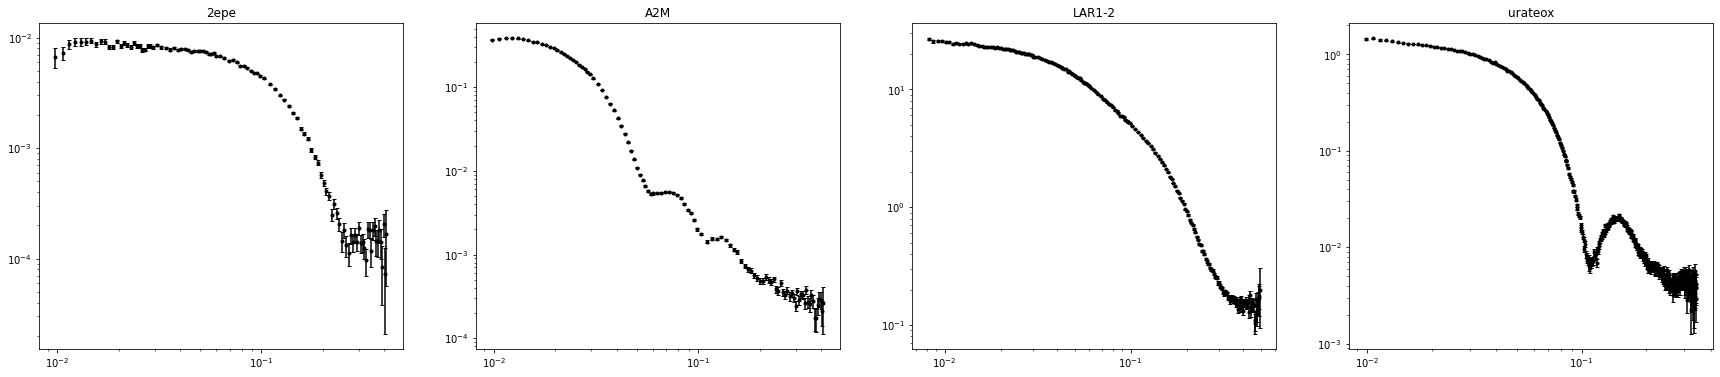

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.6421                     │              Nfcn = 144              │
│ EDM = 3.48e-05 (Goal: 0.0002)    │            time = 0.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.00    │   0.01    │            │            │    0    │    2    │  yes  │
│ 1 │ b    │   0.011   │   0.006   │            │            │    0    │         │       │
│ 2 │ c    │    3.0    │    1.7    │            │            │    0    │    3    │       │
│ 3 │ d    │     0     │     4     │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │        a        b        c        d │
├───┼─────────────────────────────────────┤
│ a │        0        0        0        0 │
│ b │        0 3.09e-05 0.000397 6.41e-05 │
│ c │        0 0.000397     29.8     13.6 │
│ d │        0 6.41e-05     13.6     6.95 │
└───┴─────────────────────────────────────┘

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from IPython.display import display

data1 = np.loadtxt("../data/2epe.RSR", skiprows=3, usecols=[0, 1, 2])
data2 = np.loadtxt("../data/A2M_ma.RSR", skiprows=3, usecols=[0, 1, 2])
data3 = np.loadtxt("../data/LAR1-2.RSR", skiprows=3, usecols=[0, 1, 2])
data4 = np.loadtxt("../data/urateox.RSR", skiprows=3, usecols=[0, 1, 2])
data5 = np.loadtxt("../data/lyzo.RSR", skiprows=3, usecols=[0, 1, 2])
data6 = np.loadtxt("../data/S_01.RSR", skiprows=3, usecols=[0, 1, 2])
data7 = np.loadtxt("../data/S_02.RSR", skiprows=3, usecols=[0, 1, 2])
data8 = np.loadtxt("../data/S_03.RSR", skiprows=3, usecols=[0, 1, 2])

def plotter(ax, data, title):
    ax.semilogx()
    ax.semilogy()
    ax.set_title(title)
    ax.errorbar(data[:, 0], data[:, 1], data[:, 2], fmt="k.", capsize=2)

fig, ax = plt.subplots(1, 4, figsize=(30, 6))
plotter(ax[0], data1, "2epe")
plotter(ax[1], data2, "A2M")
plotter(ax[2], data3, "LAR1-2")
plotter(ax[3], data4, "urateox")

def model(x, y, a, b, c, d):
    return np.power(y, a)*b + np.power(x, c)*d

def simple(a, b, c, d, data):
    x, y, yerr = data[:, 0], data[:, 1], data[:, 2]
    cost = 0
    for i in range(len(data)):
        cost += np.square(model(x[i], y[i], a, b, c, d) - yerr[i])
    return cost

def wrapper(a, b, c, d):
    cost = 0
    cost += simple(a, b, c, d, data1)
    cost += simple(a, b, c, d, data2)
    cost += simple(a, b, c, d, data3)
    cost += simple(a, b, c, d, data4)
    return cost

plt.show()
m = Minuit(wrapper, a = 1, b = 0.05, c = 1, d = 1)
m.errordef = 1
m.limits = [(0, 2), (0, None), (0, 3), (0, None)]
m.fixed[0] = True
display(m.migrad())

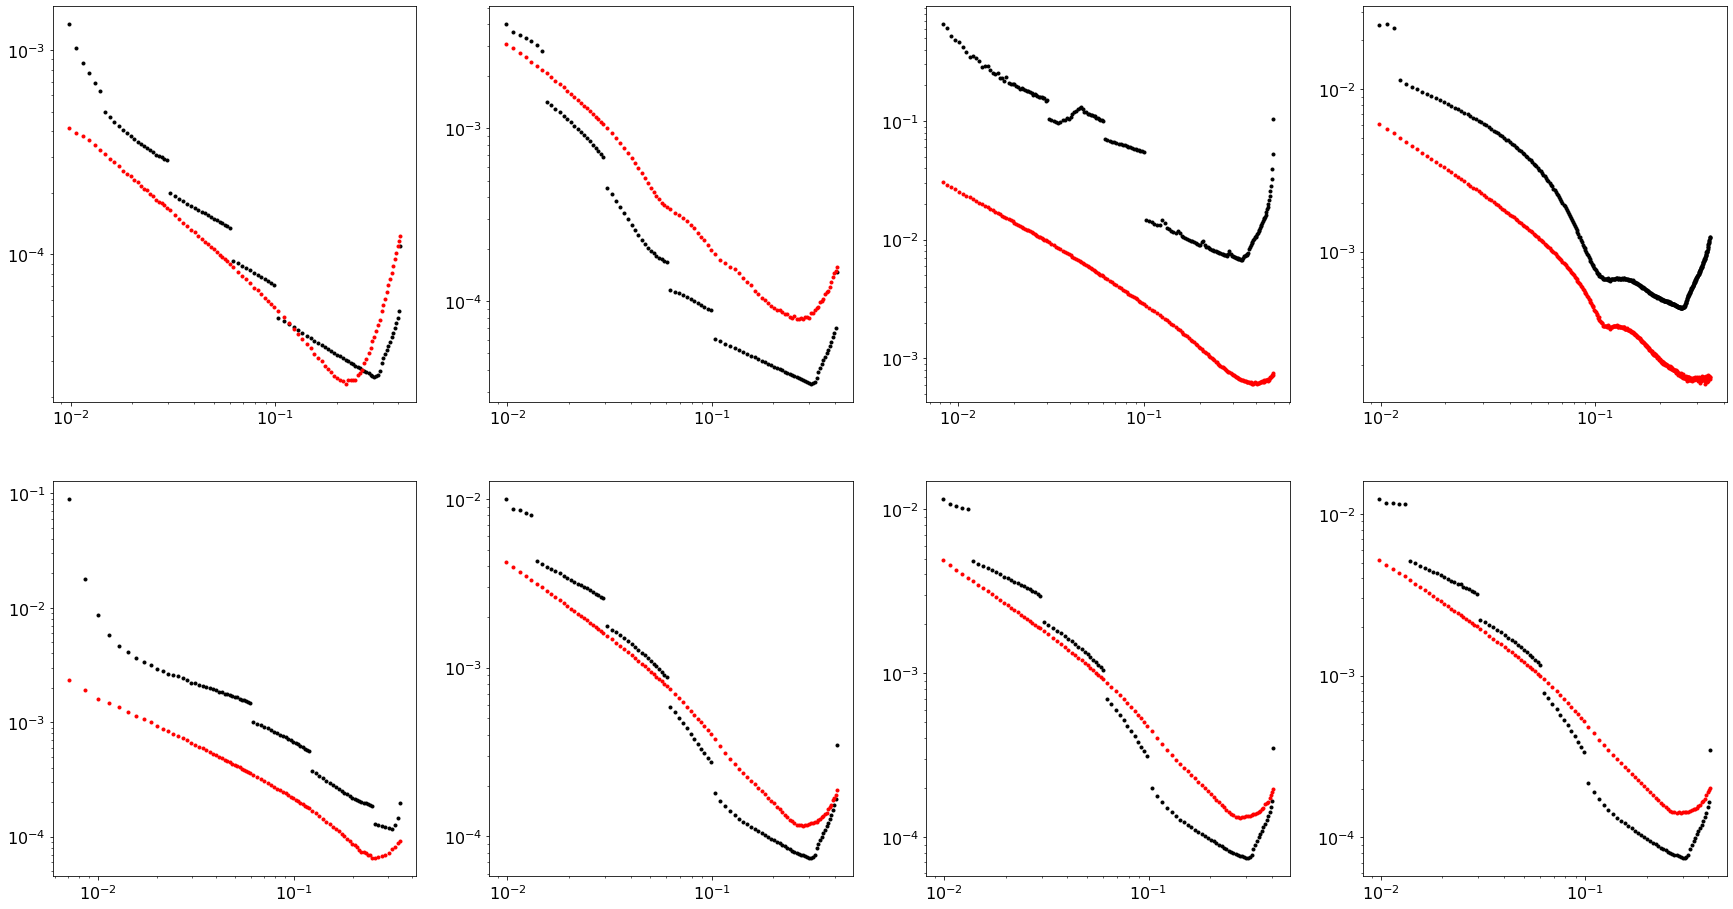

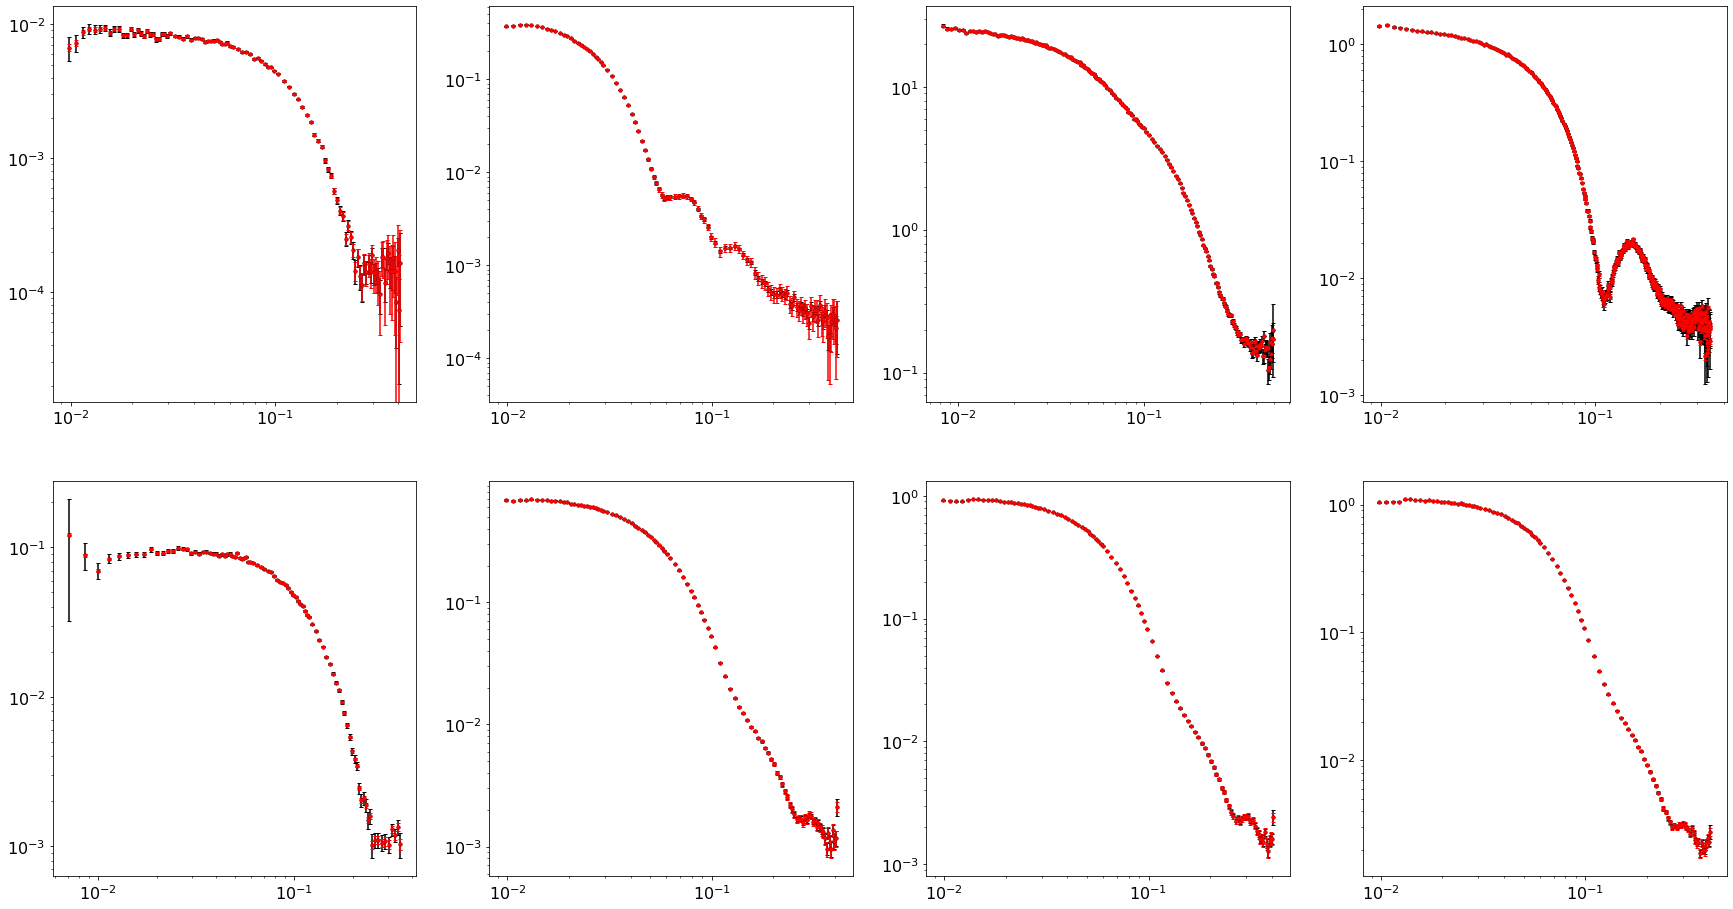

In [74]:
def model(x, y, y0):
    return np.power(y*y0, 0.25)*np.power(x, -0.85)/5000 + np.power(x, 8)*np.power(y0 - y + 0.1, 0.75) # fits right extremely well

def model(x, y, y0):
    return np.power(y, 0.15)*np.power(y0, 0.35)*np.power(x, -1)/10000 + np.power(x, 5)/100

def model(x, y, y0):
    return np.power(y, 0.15)*np.power(y0, 0.35)*np.power(x, -0.85)/10000 + np.power(x, 5)/100

def plotter(ax, data, title):
    x, y, yerr = data[:, 0], data[:, 1], data[:, 2]
    yerr_sim = model(x, y, y[0])
    plt.sca(ax)
    plt.semilogx()
    plt.semilogy()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.plot(x, yerr, "k.")
    plt.plot(x, yerr_sim, "r.")

fig, ax = plt.subplots(2, 4, figsize=(30, 16))
plotter(ax[0][0], data1, "2epe")
plotter(ax[0][1], data2, "A2M")
plotter(ax[0][2], data3, "LAR1-2")
plotter(ax[0][3], data4, "urateox")
plotter(ax[1][0], data5, "lyzo")
plotter(ax[1][1], data6, "S_01")
plotter(ax[1][2], data7, "S_02")
plotter(ax[1][3], data8, "S_03")
plt.show()

def plotter(ax, data, title):
    x, y, yerr = data[:, 0], data[:, 1], data[:, 2]
    yerr_sim = model(x, y, y[0])
    plt.sca(ax)
    plt.semilogx()
    plt.semilogy()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.errorbar(x, y, yerr, fmt="k.", capsize=2)
    plt.errorbar(x, y, yerr_sim, fmt="r.", capsize=2)

fig, ax = plt.subplots(2, 4, figsize=(30, 16))
plotter(ax[0][0], data1, "2epe")
plotter(ax[0][1], data2, "A2M")
plotter(ax[0][2], data3, "LAR1-2")
plotter(ax[0][3], data4, "urateox")
plotter(ax[1][0], data5, "lyzo")
plotter(ax[1][1], data6, "S_01")
plotter(ax[1][2], data7, "S_02")
plotter(ax[1][3], data8, "S_03")
plt.show()